In [2]:
#Import needed packages
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):
    print(f"Scrapping page {i}")
    
    #create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    
    #collect html data from this page
    response = requests.get(url)
    
    #parse content 
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
        
    print(f" --> {len(reviews)} total reviews")

Scrapping page 1
 --> 100 total reviews
Scrapping page 2
 --> 200 total reviews
Scrapping page 3
 --> 300 total reviews
Scrapping page 4
 --> 400 total reviews
Scrapping page 5
 --> 500 total reviews
Scrapping page 6
 --> 600 total reviews
Scrapping page 7
 --> 700 total reviews
Scrapping page 8
 --> 800 total reviews
Scrapping page 9
 --> 900 total reviews
Scrapping page 10
 --> 1000 total reviews


In [5]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Flight at 8.40am from DUB to...
1,✅ Trip Verified | Terrible. I have traveled t...
2,✅ Trip Verified | The customer service is ugl...
3,✅ Trip Verified | Most uncomfortable flight I...
4,✅ Trip Verified | I booked our first out of c...


In [6]:
df.to_csv("C:\\Users\HP\Desktop\DATA SCIENCE/BritishAirways_reviews.csv")

In [7]:
df

,reviews
0,✅ Trip Verified | Flight at 8.40am from DUB to...
1,✅ Trip Verified | Terrible. I have traveled t...
2,✅ Trip Verified | The customer service is ugl...
3,✅ Trip Verified | Most uncomfortable flight I...
4,✅ Trip Verified | I booked our first out of c...
...,...
995,✅ Trip Verified | Bad service and attitude al...
996,✅ Trip Verified | London to Santiago de Chile...
997,✅ Trip Verified | Flew a now ageing B777 flig...
998,✅ Trip Verified | Flew London Gatwick to Tiran...


In [8]:
df.reviews = df.reviews.str.split('|', expand=True)[1]

In [9]:
df

,reviews
0,Flight at 8.40am from DUB to LCY cancelled 11...
1,Terrible. I have traveled twice with them th...
2,The customer service is ugly. Tried calling ...
3,Most uncomfortable flight I have ever experi...
4,I booked our first out of country trip to ta...
...,...
995,Bad service and attitude all round. My fiasc...
996,London to Santiago de Chile. I was flying pr...
997,Flew a now ageing B777 flight BA 0053 to Sea...
998,Flew London Gatwick to Tirana Rinas. Bag drop...


## Cleaning the text

In [10]:
import re

#define fucnction to clean text
def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

#cleaning text in the reviews column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Flight at 8.40am from DUB to LCY cancelled 11...,Flight at am from DUB to LCY cancelled pm nig...
1,Terrible. I have traveled twice with them th...,Terrible I have traveled twice with them this...
2,The customer service is ugly. Tried calling ...,The customer service is ugly Tried calling tw...
3,Most uncomfortable flight I have ever experi...,Most uncomfortable flight I have ever experie...
4,I booked our first out of country trip to ta...,I booked our first out of country trip to tak...


In [11]:
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
#the nltk.corpus package defines a collection of corpus reader classes, which can be used to acessed the content

nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

#pos tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
            #print(tag[0])
            #print(pos_dict.get(tag[0]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,Flight at 8.40am from DUB to LCY cancelled 11...,Flight at am from DUB to LCY cancelled pm nig...,"[(Flight, n), (DUB, n), (LCY, n), (cancelled, ..."
1,Terrible. I have traveled twice with them th...,Terrible I have traveled twice with them this...,"[(Terrible, a), (traveled, v), (twice, r), (ye..."
2,The customer service is ugly. Tried calling ...,The customer service is ugly Tried calling tw...,"[(customer, n), (service, n), (ugly, r), (Trie..."
3,Most uncomfortable flight I have ever experi...,Most uncomfortable flight I have ever experie...,"[(uncomfortable, a), (flight, n), (ever, r), (..."
4,I booked our first out of country trip to ta...,I booked our first out of country trip to tak...,"[(booked, v), (first, a), (country, n), (trip,..."


In [32]:
#obtaining the stem words - lemmatization 

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Flight at 8.40am from DUB to LCY cancelled 11...,Flight at am from DUB to LCY cancelled pm nig...,"[(Flight, n), (DUB, n), (LCY, n), (cancelled, ...",Flight DUB LCY cancel pm night text message ...
1,Terrible. I have traveled twice with them th...,Terrible I have traveled twice with them this...,"[(Terrible, a), (traveled, v), (twice, r), (ye...",Terrible travel twice year via business clas...
2,The customer service is ugly. Tried calling ...,The customer service is ugly Tried calling tw...,"[(customer, n), (service, n), (ugly, r), (Trie...",customer service ugly Tried call two week ag...
3,Most uncomfortable flight I have ever experi...,Most uncomfortable flight I have ever experie...,"[(uncomfortable, a), (flight, n), (ever, r), (...",uncomfortable flight ever experience long ti...
4,I booked our first out of country trip to ta...,I booked our first out of country trip to tak...,"[(booked, v), (first, a), (country, n), (trip,...",book first country trip take husband surpris...


In [38]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Flight at 8.40am from DUB to LCY cancelled 11...,Flight DUB LCY cancel pm night text message ...
1,Terrible. I have traveled twice with them th...,Terrible travel twice year via business clas...
2,The customer service is ugly. Tried calling ...,customer service ugly Tried call two week ag...
3,Most uncomfortable flight I have ever experi...,uncomfortable flight ever experience long ti...
4,I booked our first out of country trip to ta...,book first country trip take husband surpris...
...,...,...
995,Bad service and attitude all round. My fiasc...,Bad service attitude round fiasco flight Lon...
996,London to Santiago de Chile. I was flying pr...,London Santiago de Chile fly premium economy...
997,Flew a now ageing B777 flight BA 0053 to Sea...,Flew age B flight BA Seattle Pleasant flight...
998,Flew London Gatwick to Tirana Rinas. Bag drop...,Flew London Gatwick Tirana Rinas Bag drop Ga...


## Sentiment Analysis using VADER
Valence Aware Dictionary and Sentiment Reasoner

In [39]:
!pip install vaderSentiment

In [44]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0:
        return 'Negative'
    else:
        return 'Neutral'
    
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Flight at 8.40am from DUB to LCY cancelled 11...,Flight at am from DUB to LCY cancelled pm nig...,"[(Flight, n), (DUB, n), (LCY, n), (cancelled, ...",Flight DUB LCY cancel pm night text message ...,-0.8468,Negative
1,Terrible. I have traveled twice with them th...,Terrible I have traveled twice with them this...,"[(Terrible, a), (traveled, v), (twice, r), (ye...",Terrible travel twice year via business clas...,-0.8860,Negative
2,The customer service is ugly. Tried calling ...,The customer service is ugly Tried calling tw...,"[(customer, n), (service, n), (ugly, r), (Trie...",customer service ugly Tried call two week ag...,-0.7184,Negative
3,Most uncomfortable flight I have ever experi...,Most uncomfortable flight I have ever experie...,"[(uncomfortable, a), (flight, n), (ever, r), (...",uncomfortable flight ever experience long ti...,-0.6808,Negative
4,I booked our first out of country trip to ta...,I booked our first out of country trip to tak...,"[(booked, v), (first, a), (country, n), (trip,...",book first country trip take husband surpris...,0.8720,Positive


In [45]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    510
Negative    384
Neutral     106
Name: Analysis, dtype: int64

# Visual Representation

([<matplotlib.patches.Wedge at 0x22d0286ec40>,
 [Text(-0.034551802045584716, 1.0994572174374968, 'Positive'),
  Text(-0.3267457916587643, -1.050350983068654, 'Negative'),
  Text(1.2758351325693755, -0.44129889474332934, 'Neutral')],
 [Text(-0.018846437479409842, 0.5997039367840891, '51.0%'),
  Text(-0.17822497726841688, -0.5729187180374475, '38.4%'),
  Text(0.8033036019881252, -0.2778548596532074, '10.6%')])

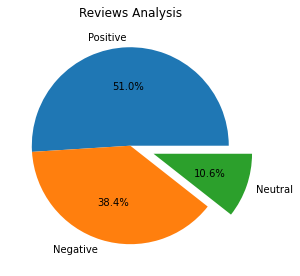

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode=(0,0,0.25), autopct='%1.1f%%', shadow=False)